# Resumo modelo + validação

In [10]:
# Resumo modelo + validação DecisionTreeClassifier

import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/Nunes0220/Valida-o_de_Modelos/refs/heads/main/emp_automovel.csv')
dados.head()

# X separar features(x) e tarfet(y)
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate

seed = 5
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=seed)

# Treino + validação cruzada
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

modelo = DecisionTreeClassifier(max_depth=10, random_state=seed)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(modelo, x_train, y_train, cv=skf, scoring=["recall","precision","accuracy","f1"])
scv

def media_desvio(metrica):
  media = scv[metrica].mean()
  devio_padrao = round(scv[metrica].std(),4)
  # print(f"{metrica}: {media} +- {devio_padrao}")
  print(f"{metrica} média: {round(media - 2*devio_padrao,4)} - {round(media + 2*devio_padrao,4)}")

print("\nDecision Tree")
media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")

# Resumo modelo forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

modelo = RandomForestClassifier(n_estimators= 100, max_depth=10, random_state=seed)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(modelo, x_train, y_train, cv=skf, scoring=["recall","precision","accuracy","f1"])
scv

def media_desvio(metrica):
  media = scv[metrica].mean()
  devio_padrao = round(scv[metrica].std(),4)
  # print(f"{metrica}: {media} +- {devio_padrao}")
  print(f"{metrica} média: {round(media - 2*devio_padrao,4)} - {round(media + 2*devio_padrao,4)}")

print("\nRandom Forest")
media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")

# KNEIGHOURS

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
modelo = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(modelo, x_train, y_train, cv=skf, scoring=["recall","precision","accuracy","f1"])
scv

def media_desvio(metrica):
  media = scv[metrica].mean()
  devio_padrao = round(scv[metrica].std(),4)
  # print(f"{metrica}: {media} +- {devio_padrao}")
  print(f"{metrica} média: {round(media - 2*devio_padrao,4)} - {round(media + 2*devio_padrao,4)}")

print("\nKNeighbors")
media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")


Decision Tree
test_accuracy média: 0.9055 - 0.9087
test_recall média: 0.0071 - 0.0347
test_precision média: 0.1163 - 0.2711
test_f1 média: 0.0137 - 0.0617

Random Forest
test_accuracy média: 0.9124 - 0.9128
test_recall média: -0.0017 - 0.0043
test_precision média: -0.2039 - 0.7105
test_f1 média: -0.0032 - 0.0084

KNeighbors
test_accuracy média: 0.9028 - 0.908
test_recall média: 0.0061 - 0.0189
test_precision média: 0.0581 - 0.1757
test_f1 média: 0.0111 - 0.0339


# Métodos de Classificação e Balanciamento


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate

x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=seed)

sm = SMOTE(random_state=seed)
x_balanceado, y_balanceado = sm.fit_resample(x_treino, y_treino)
y_balanceado.value_counts()

modelo = DecisionTreeClassifier(max_depth=10, random_state=seed)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring=["recall","precision","accuracy","f1"])

def media_desvio(metrica):
  media = scv[metrica].mean()
  devio_padrao = round(scv[metrica].std(),4)
  # print(f"{metrica}: {media} +- {devio_padrao}")
  print(f"{metrica} média: {round(media - 2*devio_padrao,3)} - {round(media + 2*devio_padrao,3)}")

media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")

test_accuracy média: 0.781 - 0.783
test_recall média: 0.709 - 0.737
test_precision média: 0.812 - 0.828
test_f1 média: 0.764 - 0.773


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate

x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=seed)

#pipeline - balanceamento e validaçao
from imblearn.pipeline import Pipeline as imbpipeline

sm = SMOTE(random_state=seed)
modelo = DecisionTreeClassifier(max_depth=10, random_state=seed)

pipeline = imbpipeline([("balanceamento", sm), ("modelo", modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline, x_treino, y_treino, cv=skf, scoring=["recall","precision","accuracy","f1"])

def media_desvio(metrica):
  media = scv[metrica].mean()
  devio_padrao = round(scv[metrica].std(),4)
  # print(f"{metrica}: {media} +- {devio_padrao}")
  print(f"{metrica} média: {round(media - 2*devio_padrao,3)} - {round(media + 2*devio_padrao,3)}")

media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")

test_accuracy média: 0.755 - 0.807
test_recall média: 0.188 - 0.268
test_precision média: 0.101 - 0.131
test_f1 média: 0.136 - 0.172


## DecisiontreeCassifier

-------Teste validação cuzada-------
test_accuracy média: 0.755 - 0.807
test_recall média: 0.188 - 0.268
test_precision média: 0.101 - 0.131
test_f1 média: 0.136 - 0.172

-------Teste modelo final-----------
Acurácia: 0.794
Precisão: 0.129
Recall:   0.238
F1-score: 0.167



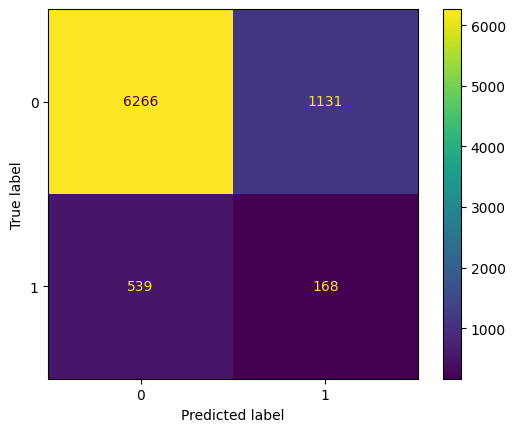

In [13]:
# DecisionTreeClassifier Smote

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate

x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=seed)

#pipeline - balanceamento e validaçao
from imblearn.pipeline import Pipeline as imbpipeline

sm = SMOTE(random_state=seed)
modelo = DecisionTreeClassifier(max_depth=10, random_state=seed)

pipeline = imbpipeline([("balanceamento", sm), ("modelo", modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline, x_treino, y_treino, cv=skf, scoring=["recall","precision","accuracy","f1"])

def media_desvio(metrica):
  media = scv[metrica].mean()
  devio_padrao = round(scv[metrica].std(),4)
  # print(f"{metrica}: {media} +- {devio_padrao}")
  print(f"{metrica} média: {round(media - 2*devio_padrao,3)} - {round(media + 2*devio_padrao,3)}")

print("-------Teste validação cuzada-------")
media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")

# Treinando o modelo para utilização
x_balanceado, y_balanceado = sm.fit_resample(x_treino, y_treino)
modelo_final = modelo.fit(x_balanceado, y_balanceado)
y_pred = modelo_final.predict(x_test)

# Teste do modelo vinal com os dados de teste
print("\n-------Teste modelo final-----------")
print(f'Acurácia: {round(accuracy_score(y_test, y_pred),3)}')
print(f'Precisão: {round(precision_score(y_test, y_pred),3)}')
print(f'Recall:   {round(recall_score(y_test, y_pred),3)}')
print(f'F1-score: {round(f1_score(y_test, y_pred),3)}\n')

matrix = confusion_matrix(y_test, y_pred)
matrix

from sklearn.metrics import ConfusionMatrixDisplay
grafico_matrix = ConfusionMatrixDisplay(matrix, display_labels=modelo_final.classes_)
grafico_matrix.plot()

-------Teste validação cuzada-------
test_accuracy média: 0.26 - 0.291
test_recall média: 0.735 - 0.801
test_precision média: 0.084 - 0.09
test_f1 média: 0.15 - 0.162

-------Teste modelo final-----------
Acurácia: 0.274
Precisão: 0.088
Recall:   0.778
F1-score: 0.157



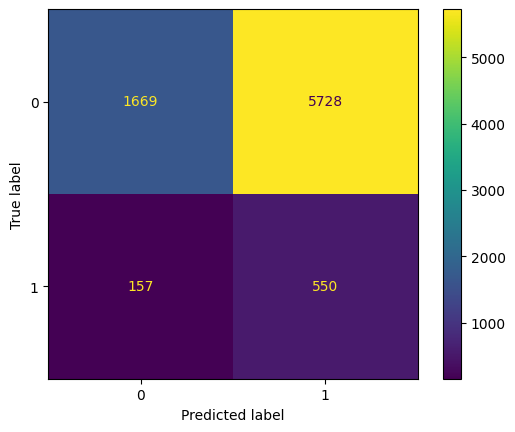

In [14]:
# DecisionTreeClassifier NearMiss

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split, cross_validate

x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=seed)

#pipeline - balanceamento e validaçao
from imblearn.pipeline import Pipeline as imbpipeline

nm = NearMiss()
modelo = DecisionTreeClassifier(max_depth=10, random_state=seed)

pipeline = imbpipeline([("balanceamento", nm), ("modelo", modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline, x_treino, y_treino, cv=skf, scoring=["recall","precision","accuracy","f1"])

def media_desvio(metrica):
  media = scv[metrica].mean()
  devio_padrao = round(scv[metrica].std(),4)
  # print(f"{metrica}: {media} +- {devio_padrao}")
  print(f"{metrica} média: {round(media - 2*devio_padrao,3)} - {round(media + 2*devio_padrao,3)}")

print("-------Teste validação cuzada-------")
media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")

# Treinando o modelo para utilização
x_balanceado, y_balanceado = nm.fit_resample(x_treino, y_treino)
modelo_final = modelo.fit(x_balanceado, y_balanceado)
y_pred = modelo_final.predict(x_test)

# Teste do modelo vinal com os dados de teste
print("\n-------Teste modelo final-----------")
print(f'Acurácia: {round(accuracy_score(y_test, y_pred),3)}')
print(f'Precisão: {round(precision_score(y_test, y_pred),3)}')
print(f'Recall:   {round(recall_score(y_test, y_pred),3)}')
print(f'F1-score: {round(f1_score(y_test, y_pred),3)}\n')

matrix = confusion_matrix(y_test, y_pred)
matrix

from sklearn.metrics import ConfusionMatrixDisplay
grafico_matrix = ConfusionMatrixDisplay(matrix, display_labels=modelo_final.classes_)
grafico_matrix.plot()

-------Teste validação cuzada-------
test_accuracy média: 0.26 - 0.291
test_recall média: 0.735 - 0.801
test_precision média: 0.084 - 0.09
test_f1 média: 0.15 - 0.162

-------Teste modelo final-----------
Acurácia: 0.834
Precisão: 0.188
Recall:   0.272
F1-score: 0.222



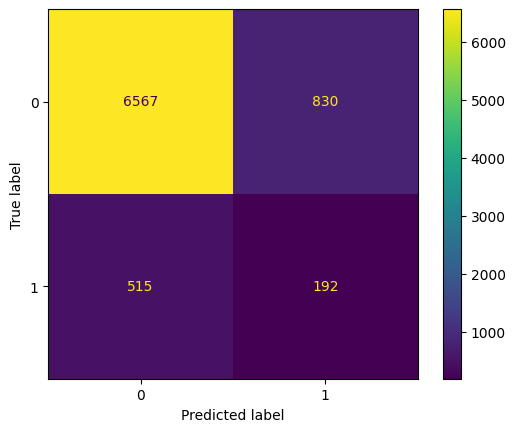

In [15]:
# DecisionTreeClassifier SmotEEN

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTEN
from sklearn.model_selection import train_test_split, cross_validate

x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=seed)

#pipeline - balanceamento e validaçao
from imblearn.pipeline import Pipeline as imbpipeline

sme = SMOTEN()
modelo = DecisionTreeClassifier(max_depth=10, random_state=seed)

pipeline = imbpipeline([("balanceamento", nm), ("modelo", modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline, x_treino, y_treino, cv=skf, scoring=["recall","precision","accuracy","f1"])

def media_desvio(metrica):
  media = scv[metrica].mean()
  devio_padrao = round(scv[metrica].std(),4)
  # print(f"{metrica}: {media} +- {devio_padrao}")
  print(f"{metrica} média: {round(media - 2*devio_padrao,3)} - {round(media + 2*devio_padrao,3)}")

print("-------Teste validação cuzada-------")
media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")

# Treinando o modelo para utilização
x_balanceado, y_balanceado = sme.fit_resample(x_treino, y_treino)
modelo_final = modelo.fit(x_balanceado, y_balanceado)
y_pred = modelo_final.predict(x_test)

# Teste do modelo vinal com os dados de teste
print("\n-------Teste modelo final-----------")
print(f'Acurácia: {round(accuracy_score(y_test, y_pred),3)}')
print(f'Precisão: {round(precision_score(y_test, y_pred),3)}')
print(f'Recall:   {round(recall_score(y_test, y_pred),3)}')
print(f'F1-score: {round(f1_score(y_test, y_pred),3)}\n')

matrix = confusion_matrix(y_test, y_pred)
matrix

from sklearn.metrics import ConfusionMatrixDisplay
grafico_matrix = ConfusionMatrixDisplay(matrix, display_labels=modelo_final.classes_)
grafico_matrix.plot()

## Kneighbors

-------Teste validação cuzada-------
test_accuracy média: 0.67 - 0.682
test_recall média: 0.306 - 0.397
test_precision média: 0.091 - 0.115
test_f1 média: 0.14 - 0.178

-------Teste modelo final-----------
Acurácia: 0.683
Precisão: 0.11
Recall:   0.373
F1-score: 0.17



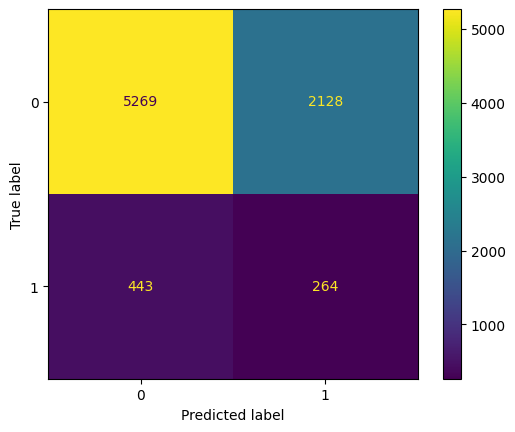

In [16]:
# KNeighborsClassifier Smote

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate

x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=seed)

#pipeline - balanceamento e validaçao
from imblearn.pipeline import Pipeline as imbpipeline

sm = SMOTE(random_state=seed)
modelo = KNeighborsClassifier()

pipeline = imbpipeline([("balanceamento", sm), ("modelo", modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline, x_treino, y_treino, cv=skf, scoring=["recall","precision","accuracy","f1"])

def media_desvio(metrica):
  media = scv[metrica].mean()
  devio_padrao = round(scv[metrica].std(),4)
  # print(f"{metrica}: {media} +- {devio_padrao}")
  print(f"{metrica} média: {round(media - 2*devio_padrao,3)} - {round(media + 2*devio_padrao,3)}")

print("-------Teste validação cuzada-------")
media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")

# Treinando o modelo para utilização
x_balanceado, y_balanceado = sm.fit_resample(x_treino, y_treino)
modelo_final = modelo.fit(x_balanceado, y_balanceado)
y_pred = modelo_final.predict(x_test)

# Teste do modelo vinal com os dados de teste
print("\n-------Teste modelo final-----------")
print(f'Acurácia: {round(accuracy_score(y_test, y_pred),3)}')
print(f'Precisão: {round(precision_score(y_test, y_pred),3)}')
print(f'Recall:   {round(recall_score(y_test, y_pred),3)}')
print(f'F1-score: {round(f1_score(y_test, y_pred),3)}\n')

matrix = confusion_matrix(y_test, y_pred)
matrix

from sklearn.metrics import ConfusionMatrixDisplay
grafico_matrix = ConfusionMatrixDisplay(matrix, display_labels=modelo_final.classes_)
grafico_matrix.plot()

-------Teste validação cuzada-------
test_accuracy média: 0.227 - 0.256
test_recall média: 0.749 - 0.807
test_precision média: 0.081 - 0.087
test_f1 média: 0.147 - 0.157

-------Teste modelo final-----------
Acurácia: 0.243
Precisão: 0.085
Recall:   0.785
F1-score: 0.153



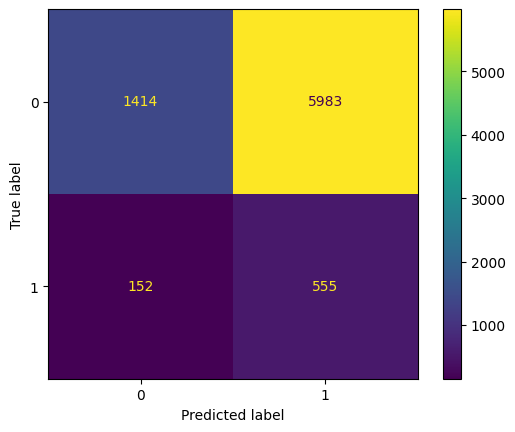

In [17]:
# KNeighborsClassifier NearMiss

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split, cross_validate

x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=seed)

#pipeline - balanceamento e validaçao
from imblearn.pipeline import Pipeline as imbpipeline

nm = NearMiss()
modelo = KNeighborsClassifier()

pipeline = imbpipeline([("balanceamento", nm), ("modelo", modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline, x_treino, y_treino, cv=skf, scoring=["recall","precision","accuracy","f1"])

def media_desvio(metrica):
  media = scv[metrica].mean()
  devio_padrao = round(scv[metrica].std(),4)
  # print(f"{metrica}: {media} +- {devio_padrao}")
  print(f"{metrica} média: {round(media - 2*devio_padrao,3)} - {round(media + 2*devio_padrao,3)}")

print("-------Teste validação cuzada-------")
media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")

# Treinando o modelo para utilização
x_balanceado, y_balanceado = nm.fit_resample(x_treino, y_treino)
modelo_final = modelo.fit(x_balanceado, y_balanceado)
y_pred = modelo_final.predict(x_test)

# Teste do modelo vinal com os dados de teste
print("\n-------Teste modelo final-----------")
print(f'Acurácia: {round(accuracy_score(y_test, y_pred),3)}')
print(f'Precisão: {round(precision_score(y_test, y_pred),3)}')
print(f'Recall:   {round(recall_score(y_test, y_pred),3)}')
print(f'F1-score: {round(f1_score(y_test, y_pred),3)}\n')

matrix = confusion_matrix(y_test, y_pred)
matrix

from sklearn.metrics import ConfusionMatrixDisplay
grafico_matrix = ConfusionMatrixDisplay(matrix, display_labels=modelo_final.classes_)
grafico_matrix.plot()

-------Teste validação cuzada-------
test_accuracy média: 0.227 - 0.256
test_recall média: 0.749 - 0.807
test_precision média: 0.081 - 0.087
test_f1 média: 0.147 - 0.157

-------Teste modelo final-----------
Acurácia: 0.82
Precisão: 0.112
Recall:   0.154
F1-score: 0.13



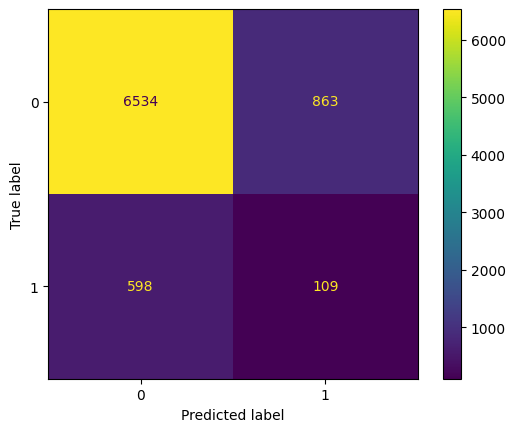

In [18]:
# KNeighborsClassifier SmotEEN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTEN
from sklearn.model_selection import train_test_split, cross_validate

x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=seed)

#pipeline - balanceamento e validaçao
from imblearn.pipeline import Pipeline as imbpipeline

sme = SMOTEN()
modelo = KNeighborsClassifier()

pipeline = imbpipeline([("balanceamento", nm), ("modelo", modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline, x_treino, y_treino, cv=skf, scoring=["recall","precision","accuracy","f1"])

def media_desvio(metrica):
  media = scv[metrica].mean()
  devio_padrao = round(scv[metrica].std(),4)
  # print(f"{metrica}: {media} +- {devio_padrao}")
  print(f"{metrica} média: {round(media - 2*devio_padrao,3)} - {round(media + 2*devio_padrao,3)}")

print("-------Teste validação cuzada-------")
media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")

# Treinando o modelo para utilização
x_balanceado, y_balanceado = sme.fit_resample(x_treino, y_treino)
modelo_final = modelo.fit(x_balanceado, y_balanceado)
y_pred = modelo_final.predict(x_test)

# Teste do modelo vinal com os dados de teste
print("\n-------Teste modelo final-----------")
print(f'Acurácia: {round(accuracy_score(y_test, y_pred),3)}')
print(f'Precisão: {round(precision_score(y_test, y_pred),3)}')
print(f'Recall:   {round(recall_score(y_test, y_pred),3)}')
print(f'F1-score: {round(f1_score(y_test, y_pred),3)}\n')

matrix = confusion_matrix(y_test, y_pred)
matrix

from sklearn.metrics import ConfusionMatrixDisplay
grafico_matrix = ConfusionMatrixDisplay(matrix, display_labels=modelo_final.classes_)
grafico_matrix.plot()

## logisticRegression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

-------Teste validação cuzada-------
test_accuracy média: 0.525 - 0.57
test_recall média: 0.58 - 0.661
test_precision média: 0.106 - 0.123
test_f1 média: 0.179 - 0.207

-------Teste modelo final-----------
Acurácia: 0.543
Precisão: 0.111
Recall:   0.604
F1-score: 0.188



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


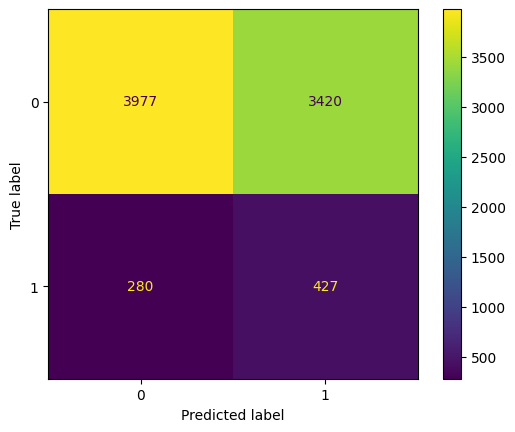

In [19]:
# LogisticRegression Smote

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate

x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=seed)

#pipeline - balanceamento e validaçao
from imblearn.pipeline import Pipeline as imbpipeline

sm = SMOTE(random_state=seed)
modelo = LogisticRegression(random_state=seed)

pipeline = imbpipeline([("balanceamento", sm), ("modelo", modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline, x_treino, y_treino, cv=skf, scoring=["recall","precision","accuracy","f1"])

def media_desvio(metrica):
  media = scv[metrica].mean()
  devio_padrao = round(scv[metrica].std(),4)
  # print(f"{metrica}: {media} +- {devio_padrao}")
  print(f"{metrica} média: {round(media - 2*devio_padrao,3)} - {round(media + 2*devio_padrao,3)}")

print("-------Teste validação cuzada-------")
media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")

# Treinando o modelo para utilização
x_balanceado, y_balanceado = sm.fit_resample(x_treino, y_treino)
modelo_final = modelo.fit(x_balanceado, y_balanceado)
y_pred = modelo_final.predict(x_test)

# Teste do modelo vinal com os dados de teste
print("\n-------Teste modelo final-----------")
print(f'Acurácia: {round(accuracy_score(y_test, y_pred),3)}')
print(f'Precisão: {round(precision_score(y_test, y_pred),3)}')
print(f'Recall:   {round(recall_score(y_test, y_pred),3)}')
print(f'F1-score: {round(f1_score(y_test, y_pred),3)}\n')

matrix = confusion_matrix(y_test, y_pred)
matrix

from sklearn.metrics import ConfusionMatrixDisplay
grafico_matrix = ConfusionMatrixDisplay(matrix, display_labels=modelo_final.classes_)
grafico_matrix.plot()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

-------Teste validação cuzada-------
test_accuracy média: 0.386 - 0.481
test_recall média: 0.579 - 0.649
test_precision média: 0.083 - 0.1
test_f1 média: 0.146 - 0.173

-------Teste modelo final-----------
Acurácia: 0.45
Precisão: 0.093
Recall:   0.608
F1-score: 0.162



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


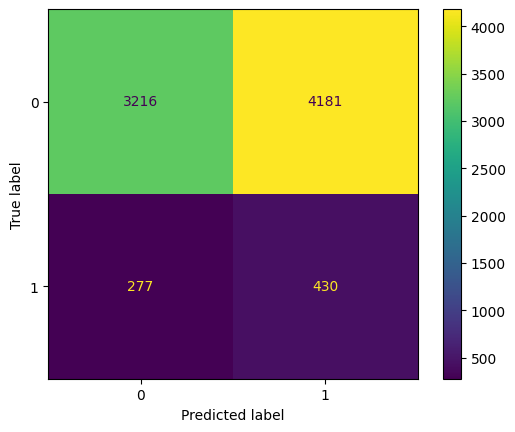

In [20]:
# LogisticRegression NearMiss

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split, cross_validate

x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=seed)

#pipeline - balanceamento e validaçao
from imblearn.pipeline import Pipeline as imbpipeline

nm = NearMiss()
modelo = LogisticRegression(random_state=seed)

pipeline = imbpipeline([("balanceamento", nm), ("modelo", modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline, x_treino, y_treino, cv=skf, scoring=["recall","precision","accuracy","f1"])

def media_desvio(metrica):
  media = scv[metrica].mean()
  devio_padrao = round(scv[metrica].std(),4)
  # print(f"{metrica}: {media} +- {devio_padrao}")
  print(f"{metrica} média: {round(media - 2*devio_padrao,3)} - {round(media + 2*devio_padrao,3)}")

print("-------Teste validação cuzada-------")
media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")

# Treinando o modelo para utilização
x_balanceado, y_balanceado = nm.fit_resample(x_treino, y_treino)
modelo_final = modelo.fit(x_balanceado, y_balanceado)
y_pred = modelo_final.predict(x_test)

# Teste do modelo vinal com os dados de teste
print("\n-------Teste modelo final-----------")
print(f'Acurácia: {round(accuracy_score(y_test, y_pred),3)}')
print(f'Precisão: {round(precision_score(y_test, y_pred),3)}')
print(f'Recall:   {round(recall_score(y_test, y_pred),3)}')
print(f'F1-score: {round(f1_score(y_test, y_pred),3)}\n')

matrix = confusion_matrix(y_test, y_pred)
matrix

from sklearn.metrics import ConfusionMatrixDisplay
grafico_matrix = ConfusionMatrixDisplay(matrix, display_labels=modelo_final.classes_)
grafico_matrix.plot()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

-------Teste validação cuzada-------
test_accuracy média: 0.386 - 0.481
test_recall média: 0.579 - 0.649
test_precision média: 0.083 - 0.1
test_f1 média: 0.146 - 0.173

-------Teste modelo final-----------
Acurácia: 0.747
Precisão: 0.144
Recall:   0.386
F1-score: 0.21



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


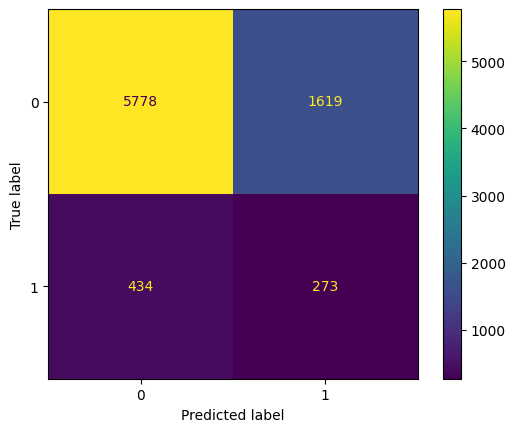

In [21]:
# LogisticRegression SmotEEN

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTEN

x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=seed)

#pipeline - balanceamento e validaçao
from imblearn.pipeline import Pipeline as imbpipeline

sme = SMOTEN()
modelo = LogisticRegression(random_state=seed)

pipeline = imbpipeline([("balanceamento", nm), ("modelo", modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline, x_treino, y_treino, cv=skf, scoring=["recall","precision","accuracy","f1"])

def media_desvio(metrica):
  media = scv[metrica].mean()
  devio_padrao = round(scv[metrica].std(),4)
  # print(f"{metrica}: {media} +- {devio_padrao}")
  print(f"{metrica} média: {round(media - 2*devio_padrao,3)} - {round(media + 2*devio_padrao,3)}")

print("-------Teste validação cuzada-------")
media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")

# Treinando o modelo para utilização
x_balanceado, y_balanceado = sme.fit_resample(x_treino, y_treino)
modelo_final = modelo.fit(x_balanceado, y_balanceado)
y_pred = modelo_final.predict(x_test)

# Teste do modelo vinal com os dados de teste
print("\n-------Teste modelo final-----------")
print(f'Acurácia: {round(accuracy_score(y_test, y_pred),3)}')
print(f'Precisão: {round(precision_score(y_test, y_pred),3)}')
print(f'Recall:   {round(recall_score(y_test, y_pred),3)}')
print(f'F1-score: {round(f1_score(y_test, y_pred),3)}\n')

matrix = confusion_matrix(y_test, y_pred)
matrix

from sklearn.metrics import ConfusionMatrixDisplay
grafico_matrix = ConfusionMatrixDisplay(matrix, display_labels=modelo_final.classes_)
grafico_matrix.plot()

## Random Forest

-------Teste validação cuzada-------
test_accuracy média: 0.782 - 0.794
test_recall média: 0.228 - 0.248
test_precision média: 0.117 - 0.133
test_f1 média: 0.155 - 0.173

-------Teste modelo final-----------
Acurácia: 0.794
Precisão: 0.12
Recall:   0.215
F1-score: 0.154



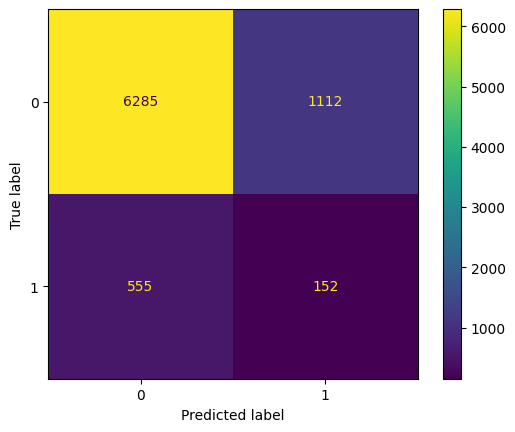

In [22]:
# RandomForestClassifier Smote

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate

x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=seed)

#pipeline - balanceamento e validaçao
from imblearn.pipeline import Pipeline as imbpipeline

sm = SMOTE(random_state=seed)
modelo = RandomForestClassifier(max_depth=10, random_state=seed)
pipeline = imbpipeline([("balanceamento", sm), ("modelo", modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline, x_treino, y_treino, cv=skf, scoring=["recall","precision","accuracy","f1"])

def media_desvio(metrica):
  media = scv[metrica].mean()
  devio_padrao = round(scv[metrica].std(),4)
  # print(f"{metrica}: {media} +- {devio_padrao}")
  print(f"{metrica} média: {round(media - 2*devio_padrao,3)} - {round(media + 2*devio_padrao,3)}")

print("-------Teste validação cuzada-------")
media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")

# Treinando o modelo para utilização
x_balanceado, y_balanceado = sm.fit_resample(x_treino, y_treino)
modelo_final = modelo.fit(x_balanceado, y_balanceado)
y_pred = modelo_final.predict(x_test)

# Teste do modelo vinal com os dados de teste
print("\n-------Teste modelo final-----------")
print(f'Acurácia: {round(accuracy_score(y_test, y_pred),3)}')
print(f'Precisão: {round(precision_score(y_test, y_pred),3)}')
print(f'Recall:   {round(recall_score(y_test, y_pred),3)}')
print(f'F1-score: {round(f1_score(y_test, y_pred),3)}\n')

matrix = confusion_matrix(y_test, y_pred)
matrix

from sklearn.metrics import ConfusionMatrixDisplay
grafico_matrix = ConfusionMatrixDisplay(matrix, display_labels=modelo_final.classes_)
grafico_matrix.plot()

-------Teste validação cuzada-------
test_accuracy média: 0.255 - 0.28
test_recall média: 0.767 - 0.799
test_precision média: 0.085 - 0.09
test_f1 média: 0.153 - 0.162

-------Teste modelo final-----------
Acurácia: 0.266
Precisão: 0.087
Recall:   0.777
F1-score: 0.156



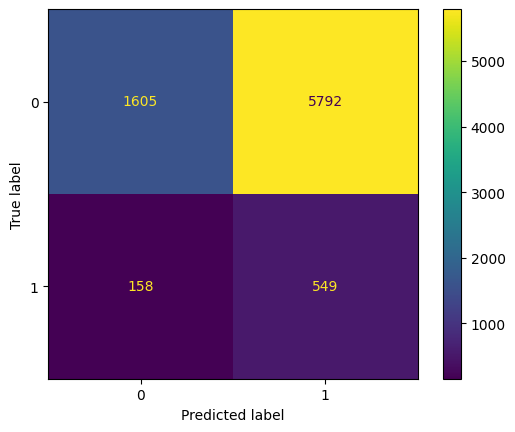

In [23]:
# RandomForestClassifier NearMiss

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split, cross_validate

x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=seed)

#pipeline - balanceamento e validaçao
from imblearn.pipeline import Pipeline as imbpipeline

nm = NearMiss()
modelo = RandomForestClassifier(max_depth=10, random_state=seed)

pipeline = imbpipeline([("balanceamento", nm), ("modelo", modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline, x_treino, y_treino, cv=skf, scoring=["recall","precision","accuracy","f1"])

def media_desvio(metrica):
  media = scv[metrica].mean()
  devio_padrao = round(scv[metrica].std(),4)
  # print(f"{metrica}: {media} +- {devio_padrao}")
  print(f"{metrica} média: {round(media - 2*devio_padrao,3)} - {round(media + 2*devio_padrao,3)}")

print("-------Teste validação cuzada-------")
media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")

# Treinando o modelo para utilização
x_balanceado, y_balanceado = nm.fit_resample(x_treino, y_treino)
modelo_final = modelo.fit(x_balanceado, y_balanceado)
y_pred = modelo_final.predict(x_test)

# Teste do modelo vinal com os dados de teste
print("\n-------Teste modelo final-----------")
print(f'Acurácia: {round(accuracy_score(y_test, y_pred),3)}')
print(f'Precisão: {round(precision_score(y_test, y_pred),3)}')
print(f'Recall:   {round(recall_score(y_test, y_pred),3)}')
print(f'F1-score: {round(f1_score(y_test, y_pred),3)}\n')

matrix = confusion_matrix(y_test, y_pred)
matrix

from sklearn.metrics import ConfusionMatrixDisplay
grafico_matrix = ConfusionMatrixDisplay(matrix, display_labels=modelo_final.classes_)
grafico_matrix.plot()

-------Teste validação cuzada-------
test_accuracy média: 0.26 - 0.291
test_recall média: 0.735 - 0.801
test_precision média: 0.084 - 0.09
test_f1 média: 0.15 - 0.162

-------Teste modelo final-----------
Acurácia: 0.841
Precisão: 0.187
Recall:   0.248
F1-score: 0.213



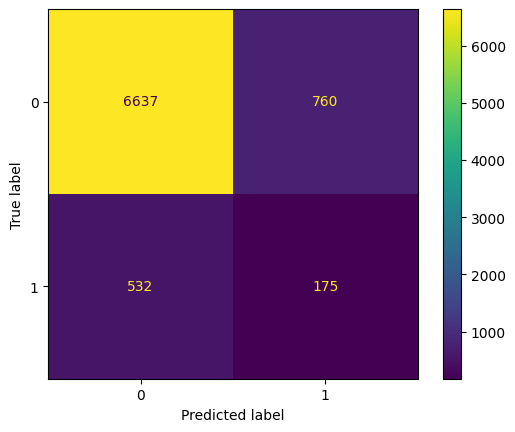

In [24]:
# RandomForestClassifier SmotEEN

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTEN
from sklearn.model_selection import train_test_split, cross_validate

x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=seed)

#pipeline - balanceamento e validaçao
from imblearn.pipeline import Pipeline as imbpipeline

sme = SMOTEN()
modelo = DecisionTreeClassifier(max_depth=10, random_state=seed)

pipeline = imbpipeline([("balanceamento", nm), ("modelo", modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline, x_treino, y_treino, cv=skf, scoring=["recall","precision","accuracy","f1"])

def media_desvio(metrica):
  media = scv[metrica].mean()
  devio_padrao = round(scv[metrica].std(),4)
  # print(f"{metrica}: {media} +- {devio_padrao}")
  print(f"{metrica} média: {round(media - 2*devio_padrao,3)} - {round(media + 2*devio_padrao,3)}")

print("-------Teste validação cuzada-------")
media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")

# Treinando o modelo para utilização
x_balanceado, y_balanceado = sme.fit_resample(x_treino, y_treino)
modelo_final = modelo.fit(x_balanceado, y_balanceado)
y_pred = modelo_final.predict(x_test)

# Teste do modelo vinal com os dados de teste
print("\n-------Teste modelo final-----------")
print(f'Acurácia: {round(accuracy_score(y_test, y_pred),3)}')
print(f'Precisão: {round(precision_score(y_test, y_pred),3)}')
print(f'Recall:   {round(recall_score(y_test, y_pred),3)}')
print(f'F1-score: {round(f1_score(y_test, y_pred),3)}\n')

matrix = confusion_matrix(y_test, y_pred)
matrix

from sklearn.metrics import ConfusionMatrixDisplay
grafico_matrix = ConfusionMatrixDisplay(matrix, display_labels=modelo_final.classes_)
grafico_matrix.plot()

Apos testar 4 algoritmos: DecisionTrion, Kneighbors, logisticRegression, Random Forest, sebdo balanceados via: Smote, NearMiss, SmotEEN.


Conseguimos o melhor resultado ao aplicar NearMiss antes do treinamento com KNN, o modelo se beneficia de uma distribuição de dados mais equilibrada e de vizinhanças mais representativas da realidade de inadimplência. Como resultado, ele consegue identificar inadimplentes com maior eficiência, mesmo que isso possa ocorrer às custas de alguma perda em precisão ou acurácia geral.